## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  44.809729  1705.509086  0.486548  9.733847  1.584038
1  66.172959  1692.906539  0.375575  3.554552  1.374076
2   2.581559   459.800009  0.494284  4.498095  1.667970
3  28.177445  1227.848955  0.957331  1.323760  1.677777
4  35.045332  1590.579901  0.651492  9.344593  1.413842


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8860958	total: 58.1ms	remaining: 58s
1:	learn: 0.8794171	total: 58.7ms	remaining: 29.3s
2:	learn: 0.8706882	total: 59.3ms	remaining: 19.7s
3:	learn: 0.8625626	total: 60.1ms	remaining: 15s
4:	learn: 0.8531146	total: 60.6ms	remaining: 12.1s
5:	learn: 0.8449526	total: 61.1ms	remaining: 10.1s
6:	learn: 0.8361252	total: 61.8ms	remaining: 8.76s
7:	learn: 0.8259396	total: 62.4ms	remaining: 7.74s
8:	learn: 0.8190867	total: 63ms	remaining: 6.93s
9:	learn: 0.8107695	total: 63.6ms	remaining: 6.3s
10:	learn: 0.8031349	total: 64.3ms	remaining: 5.78s
11:	learn: 0.7949296	total: 64.9ms	remaining: 5.34s
12:	learn: 0.7865608	total: 65.5ms	remaining: 4.97s
13:	learn: 0.7792992	total: 66ms	remaining: 4.64s
14:	learn: 0.7722435	total: 66.4ms	remaining: 4.36s
15:	learn: 0.7648620	total: 66.9ms	remaining: 4.11s
16:	learn: 0.7580955	total: 67.3ms	remaining: 3.89s
17:	learn: 0.7500117	total: 67.7ms	remaining: 3.69s
18:	learn: 0.7439364	total: 68ms	remaining: 3.51s
19:

110:	learn: 0.3619133	total: 107ms	remaining: 853ms
111:	learn: 0.3604126	total: 107ms	remaining: 849ms
112:	learn: 0.3586818	total: 107ms	remaining: 843ms
113:	learn: 0.3564957	total: 108ms	remaining: 839ms
114:	learn: 0.3541709	total: 109ms	remaining: 836ms
115:	learn: 0.3521532	total: 109ms	remaining: 831ms
116:	learn: 0.3496225	total: 109ms	remaining: 826ms
117:	learn: 0.3480806	total: 110ms	remaining: 822ms
118:	learn: 0.3461232	total: 110ms	remaining: 818ms
119:	learn: 0.3440771	total: 111ms	remaining: 813ms
120:	learn: 0.3418740	total: 111ms	remaining: 809ms
121:	learn: 0.3395920	total: 112ms	remaining: 804ms
122:	learn: 0.3376427	total: 112ms	remaining: 799ms
123:	learn: 0.3359722	total: 112ms	remaining: 794ms
124:	learn: 0.3336057	total: 113ms	remaining: 789ms
125:	learn: 0.3312603	total: 113ms	remaining: 785ms
126:	learn: 0.3289678	total: 114ms	remaining: 781ms
127:	learn: 0.3280046	total: 114ms	remaining: 776ms
128:	learn: 0.3258561	total: 115ms	remaining: 773ms
129:	learn: 

293:	learn: 0.1646518	total: 185ms	remaining: 445ms
294:	learn: 0.1642313	total: 186ms	remaining: 444ms
295:	learn: 0.1631745	total: 186ms	remaining: 443ms
296:	learn: 0.1623509	total: 187ms	remaining: 442ms
297:	learn: 0.1612867	total: 187ms	remaining: 441ms
298:	learn: 0.1610138	total: 188ms	remaining: 440ms
299:	learn: 0.1606575	total: 188ms	remaining: 439ms
300:	learn: 0.1599123	total: 189ms	remaining: 438ms
301:	learn: 0.1591125	total: 189ms	remaining: 437ms
302:	learn: 0.1584809	total: 189ms	remaining: 436ms
303:	learn: 0.1575643	total: 190ms	remaining: 435ms
304:	learn: 0.1567598	total: 190ms	remaining: 433ms
305:	learn: 0.1559646	total: 191ms	remaining: 433ms
306:	learn: 0.1551602	total: 191ms	remaining: 432ms
307:	learn: 0.1547776	total: 192ms	remaining: 431ms
308:	learn: 0.1541048	total: 192ms	remaining: 430ms
309:	learn: 0.1532175	total: 193ms	remaining: 429ms
310:	learn: 0.1523563	total: 193ms	remaining: 428ms
311:	learn: 0.1514115	total: 194ms	remaining: 427ms
312:	learn: 

525:	learn: 0.0762898	total: 288ms	remaining: 260ms
526:	learn: 0.0761786	total: 289ms	remaining: 259ms
527:	learn: 0.0760222	total: 289ms	remaining: 258ms
528:	learn: 0.0757231	total: 290ms	remaining: 258ms
529:	learn: 0.0756533	total: 290ms	remaining: 258ms
530:	learn: 0.0754193	total: 291ms	remaining: 257ms
531:	learn: 0.0752674	total: 291ms	remaining: 256ms
532:	learn: 0.0749667	total: 292ms	remaining: 256ms
533:	learn: 0.0747557	total: 292ms	remaining: 255ms
534:	learn: 0.0746876	total: 293ms	remaining: 254ms
535:	learn: 0.0744586	total: 293ms	remaining: 254ms
536:	learn: 0.0742543	total: 294ms	remaining: 253ms
537:	learn: 0.0740496	total: 294ms	remaining: 252ms
538:	learn: 0.0739067	total: 294ms	remaining: 252ms
539:	learn: 0.0736338	total: 295ms	remaining: 251ms
540:	learn: 0.0734286	total: 295ms	remaining: 250ms
541:	learn: 0.0732020	total: 296ms	remaining: 250ms
542:	learn: 0.0729798	total: 296ms	remaining: 249ms
543:	learn: 0.0725656	total: 297ms	remaining: 249ms
544:	learn: 

720:	learn: 0.0441743	total: 367ms	remaining: 142ms
721:	learn: 0.0441207	total: 368ms	remaining: 142ms
722:	learn: 0.0440241	total: 368ms	remaining: 141ms
723:	learn: 0.0438755	total: 369ms	remaining: 141ms
724:	learn: 0.0437893	total: 369ms	remaining: 140ms
725:	learn: 0.0437618	total: 370ms	remaining: 139ms
726:	learn: 0.0437091	total: 370ms	remaining: 139ms
727:	learn: 0.0436820	total: 370ms	remaining: 138ms
728:	learn: 0.0435245	total: 371ms	remaining: 138ms
729:	learn: 0.0434241	total: 371ms	remaining: 137ms
730:	learn: 0.0433974	total: 372ms	remaining: 137ms
731:	learn: 0.0432990	total: 372ms	remaining: 136ms
732:	learn: 0.0432727	total: 372ms	remaining: 136ms
733:	learn: 0.0431617	total: 373ms	remaining: 135ms
734:	learn: 0.0430653	total: 373ms	remaining: 134ms
735:	learn: 0.0430394	total: 373ms	remaining: 134ms
736:	learn: 0.0429248	total: 374ms	remaining: 133ms
737:	learn: 0.0428420	total: 374ms	remaining: 133ms
738:	learn: 0.0428165	total: 374ms	remaining: 132ms
739:	learn: 

986:	learn: 0.0216979	total: 467ms	remaining: 6.15ms
987:	learn: 0.0216395	total: 468ms	remaining: 5.68ms
988:	learn: 0.0215830	total: 468ms	remaining: 5.21ms
989:	learn: 0.0215140	total: 469ms	remaining: 4.74ms
990:	learn: 0.0214152	total: 469ms	remaining: 4.26ms
991:	learn: 0.0213825	total: 470ms	remaining: 3.79ms
992:	learn: 0.0213369	total: 470ms	remaining: 3.31ms
993:	learn: 0.0212820	total: 471ms	remaining: 2.84ms
994:	learn: 0.0211864	total: 471ms	remaining: 2.37ms
995:	learn: 0.0211422	total: 472ms	remaining: 1.89ms
996:	learn: 0.0210793	total: 472ms	remaining: 1.42ms
997:	learn: 0.0210496	total: 472ms	remaining: 946us
998:	learn: 0.0210171	total: 473ms	remaining: 473us
999:	learn: 0.0209854	total: 473ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

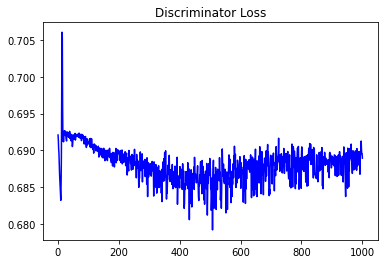

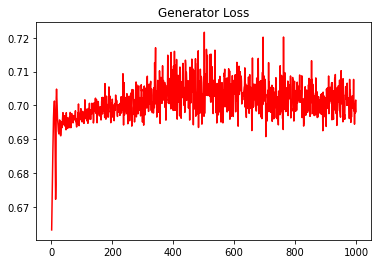

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8962606132471884


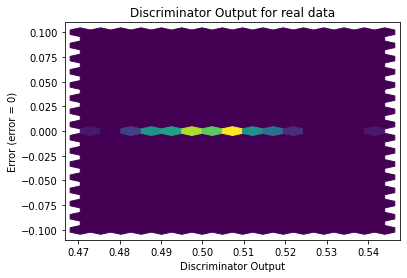

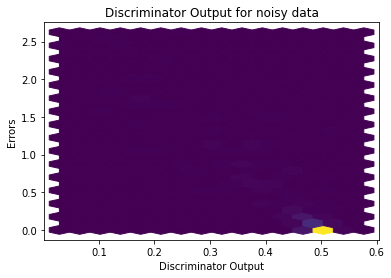

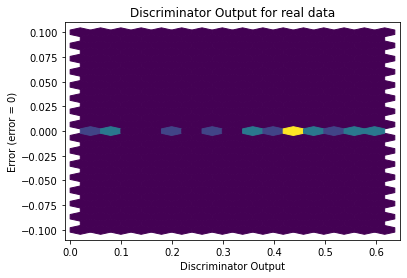

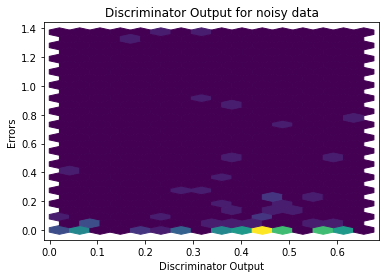

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


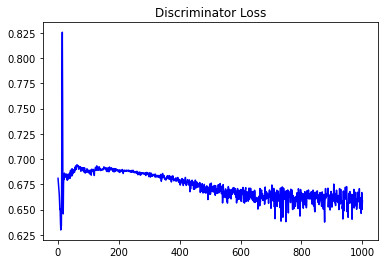

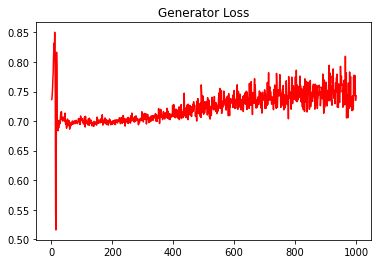

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6293499248124432


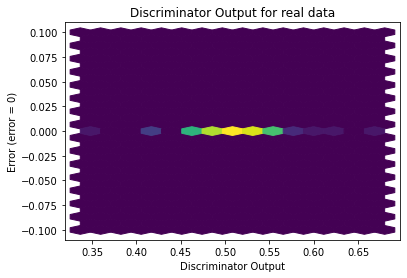

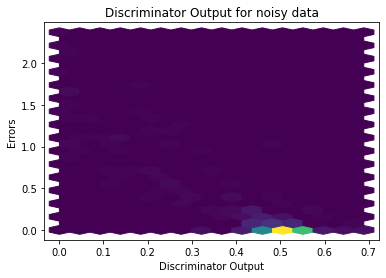

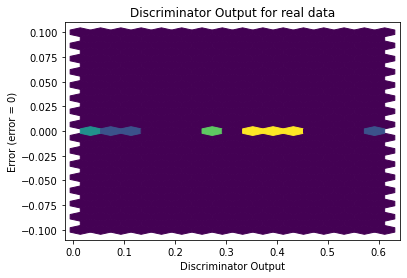

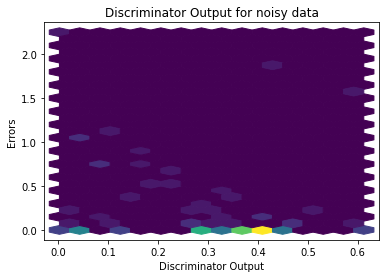

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1116]], requires_grad=True)
